# Model  Selection

In [1]:
import sys
import pandas as pd
import joblib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor
import xgboost 

In [10]:
sys.path.append ('./modules') #modules folder contains the helper file, see below

In [12]:
#helper module contains functions created to process the data
from helper import poly_reg, num_feat_list, use_data, best_model_mse

In [13]:
prepoc_train_data = joblib.load('prepoc_train_data') #loding prepocessed training data

In [14]:
prepoc_train_data

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,companyId_cat,jobType_cat,degree_cat,major_cat,industry_cat,yearsExp_cat,mfm_cat
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,1,6,4,7,4,3,2
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,11,8,2,1,5,1,3
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,43,5,5,5,4,3,7
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,40,4,5,4,3,2,9
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,18,5,3,5,6,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88,36,5,3,4,4,5,1
999996,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160,38,7,2,1,6,3,7
999997,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64,46,2,2,1,1,4,2
999998,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149,39,6,4,1,4,2,10


Baseline model - Linear Regression

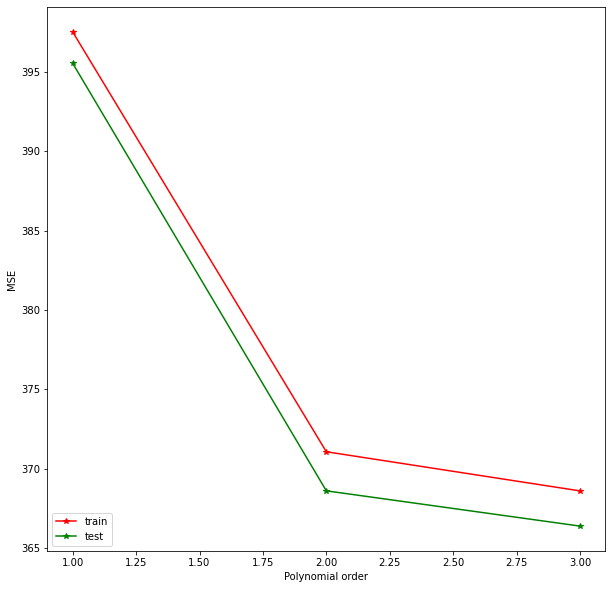

In [37]:
poly_reg(prepoc_train_data,  'salary', [1,2,3],  num_features = 'auto', test_sample = 'auto')

The results show that there is a much bigger reduction in MSE(about 28units) from a 1st order polynomial to a 2nd order polynomial
than from a 2nd order polynomial to  3rd order polynomial (less than 5units). This suggests than higher order polynomial will
will result in little improvement in MSE but will take a lot of computational effort

### Using Trees and Ensemble models (Decision Tree, Random Forest, Gradient Boost and Xtreme Gradient Boost)

MODEL MSEs
Dec_tree ---> 388.052588811057
rand_forest ---> 364.64057649194257
gradient_boost ---> 356.72270490874405
xtreme_grad_boost ---> 355.155823125185

 Best model ---->  xtreme_grad_boost   (saved as: saved_best_model)


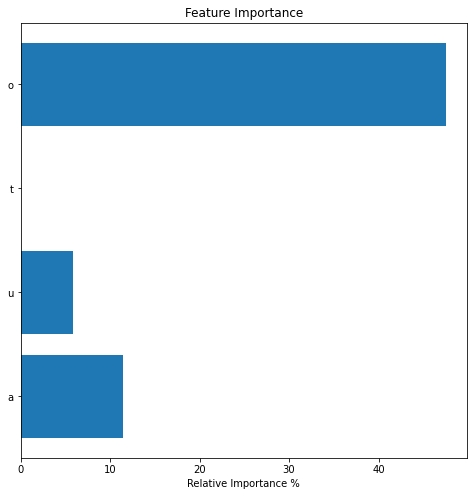

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09, max_delta_step=0, max_depth=8,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=2,
             reg_alpha=20, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
best_model_mse(prepoc_train_data,  'salary',  num_features = 'auto', test_sample = 'auto')